# Chapter 15: Classifying data with logistic regression

In [1]:
import matplotlib.pyplot    as plt
import numpy                as np
from   matplotlib           import cm
from   mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

# 15.1 Testing a classification function on real data

In [3]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

## 15.1.1 Loading the car data

In [4]:
from car_data import bmws, priuses

In [5]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for prius in priuses:
    all_car_data.append((prius.mileage,prius.price,0))

In [6]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

## 15.1.1 Testing the classification function

In [7]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw: #1
            trues += 1
        else:
            falses += 1 #1
    return trues / (trues + falses)

In [8]:
test_classifier(bmw_finder, all_car_data)

0.59

## 15.1.3 Exercises

**Exercise:** Update the `test_classifier` function to print the number of true positives, true negatives, false positives, and false negatives.  Printing these for the `bmw_finder` classifier, what can you tell about the performance of the classifier?

In [9]:
def test_classifier(classifier, data, verbose=False): #1
    true_positives = 0 #2
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for mileage, price, is_bmw in data:
        predicted = classifier(mileage,price)
        if predicted and is_bmw: #3
            true_positives += 1
        elif predicted:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
            
    if verbose:        
        print("true positives %f" % true_positives) #4
        print("true negatives %f" % true_negatives)
        print("false positives %f" % false_positives)
        print("false negatives %f" % false_negatives)
            
    return (true_positives + true_negatives) / len(data) #5

In [10]:
test_classifier(bmw_finder,all_car_data,verbose=True)

true positives 18.000000
true negatives 100.000000
false positives 0.000000
false negatives 82.000000


0.59

**Exercise:** Find a way to update the `bmw_finder` function slightly to improve its performance, and use the `test_classifier` function to confirm that your improved function has better than 59% accuracy.

In [11]:
def bmw_finder2(mileage,price):
    if price > 20000:
        return 1
    else:
        return 0

In [12]:
test_classifier(bmw_finder2, all_car_data)

0.735

# 15.2 Picturing a decision boundary

## 15.2.1 Picturing the space of cars

In [13]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

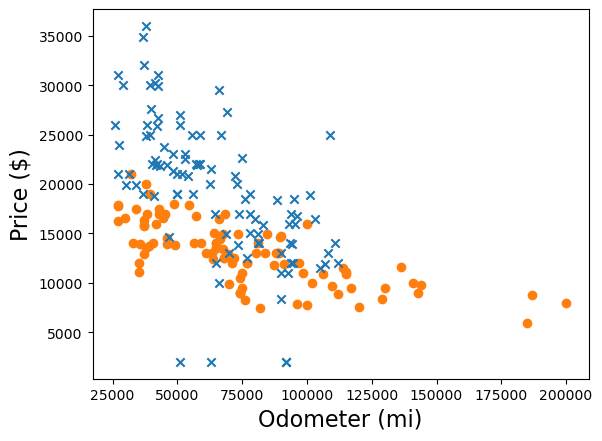

In [14]:
plot_data(all_car_data)

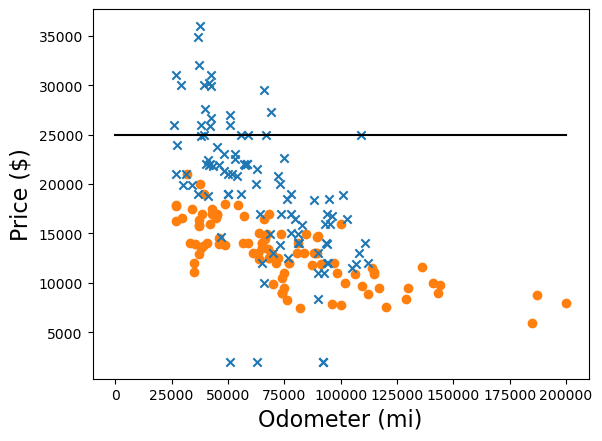

In [15]:
plot_data(all_car_data)
plot_function(lambda x: 25000, 0, 200000, c='k')

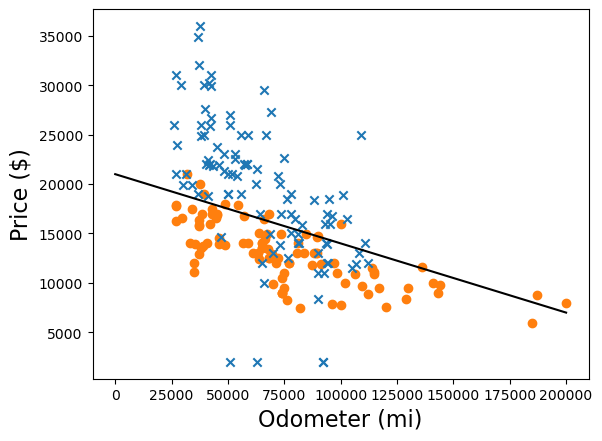

In [16]:
plot_data(all_car_data)
plot_function(lambda x: 21000 - 0.07 * x, 0, 200000, c='k')

## 15.2.3 Implementing the classification function

In [17]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [18]:
test_classifier(decision_boundary_classify, all_car_data)

0.805

## 15.2.4 Exercises

**Mini-project:** What is the decision boundary of the form $p = constant$ giving the best classification accuracy on the test data set?

In [19]:
def constant_price_classifier(cutoff_price):
    def c(x,p):
        if p > cutoff_price:
            return 1
        else:
            return 0
    return c

In [20]:
def cutoff_accuracy(cutoff_price):
    c = constant_price_classifier(cutoff_price)
    return test_classifier(c,all_car_data)

In [21]:
all_prices = [price for (mileage,price,is_bmw) in all_car_data]
max(all_prices,key=cutoff_accuracy)

17998.0

In [22]:
test_classifier(constant_price_classifier(17998.0), all_car_data)

0.795

# 15.3 Framing classification as a regression problem


## 15.3.1 Scaling the raw car data

In [23]:
def make_scale(data):
    min_val = min(data) #1
    max_val = max(data)
    def scale(x): #2
        return (x-min_val) / (max_val - min_val)
    def unscale(y): #3
        return y * (max_val - min_val) + min_val
    return scale, unscale #4

price_scale, price_unscale = make_scale([x[1] for x in all_car_data]) #5
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [24]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) 
                    for mileage,price,is_bmw in all_car_data]

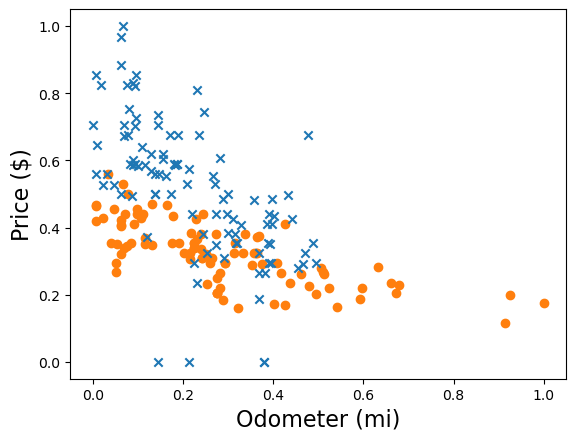

In [25]:
plot_data(scaled_car_data)

## 15.3.2 Measuring BMWness of a car

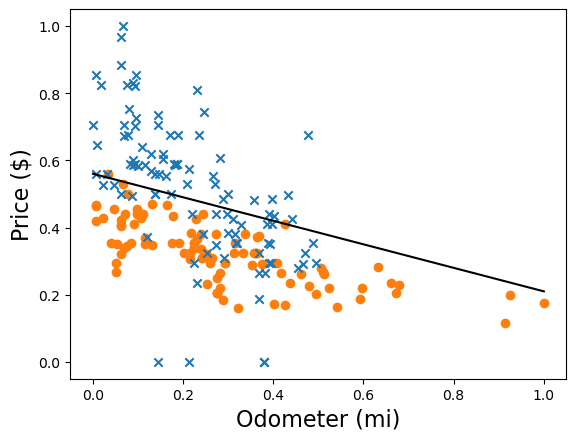

In [26]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56 - 0.35*x,0,1,c='k')

<Figure size 700x700 with 0 Axes>

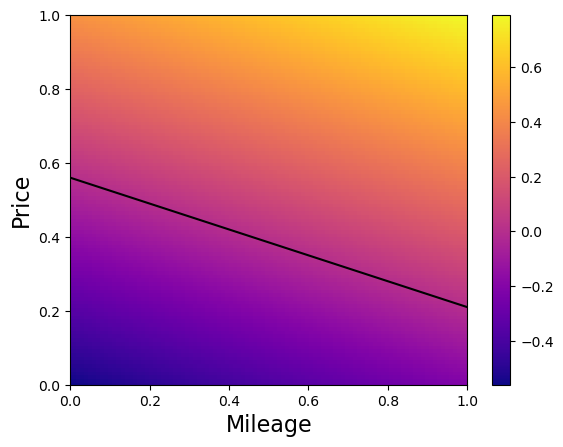

In [27]:
scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

## 15.3.3 Introducing the sigmoid function

In [28]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

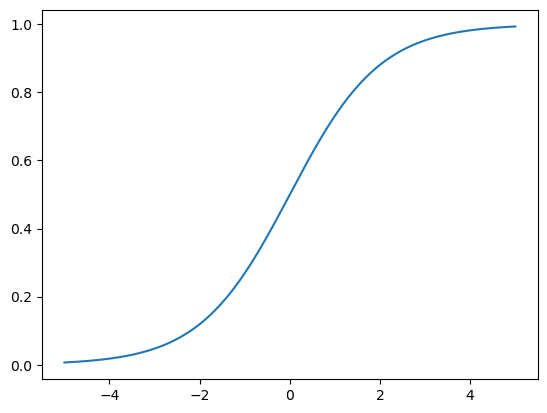

In [29]:
plot_function(sigmoid,-5,5)

## 15.3.4 Composing the sigmoid function with other functions

In [30]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

<Figure size 700x700 with 0 Axes>

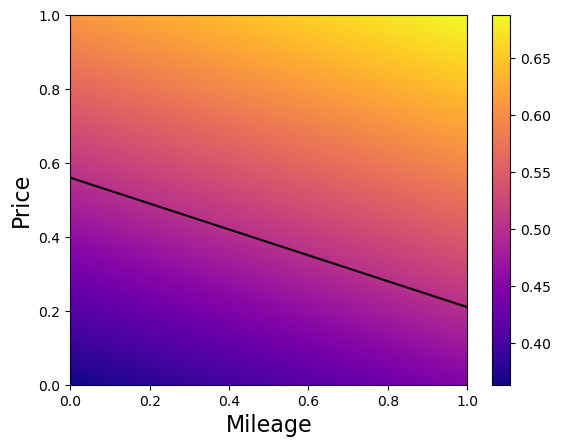

In [31]:
scalar_field_heatmap(l, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

In [32]:
plot_scalar_field(l, -5, 5, -5, 5)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

In [33]:
plot_scalar_field(f,-5,5,-5,5)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

## 15.3.4 Exercises

**Exercise:** Find a function $h(x)$ such that large positive values of $x$ cause $h(x)$ to be very close to $0$, large negative values of $x$ cause $h(x)$ to be very close to $1$, and $h(3) = 0.5$.

In [34]:
def h(x):
    return sigmoid(3-x)

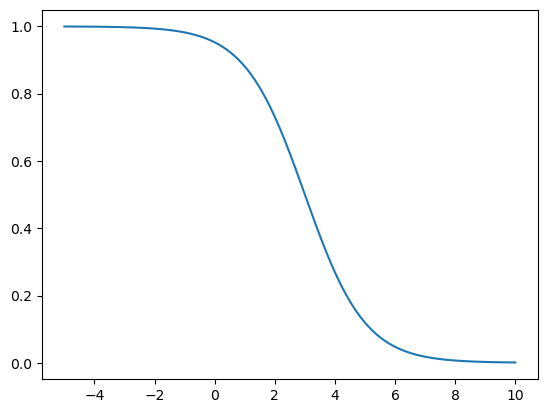

In [35]:
plot_function(h,-5,10)

# 15.4 Exploring possible logistic functions

## 15.4.1 Parametrizing logistic functions

In [36]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x + b*p - c)
    return l

## 15.4.2 Measuring the quality of fit for a logistic function

In [37]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p)) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

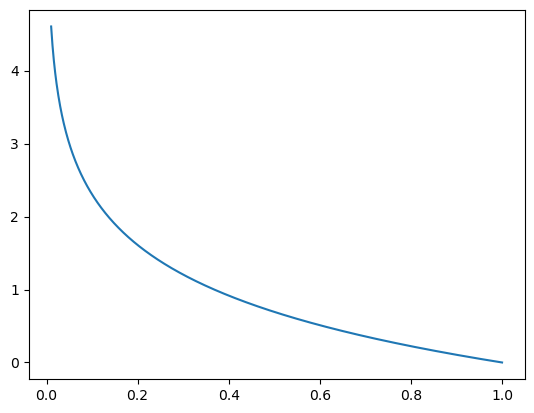

In [38]:
from math import log
plot_function(lambda x: -log(x),0.01,1)

In [39]:
-log(0.01)

4.605170185988091

In [40]:
-log(0.001)

6.907755278982137

In [41]:
def point_cost(l,x,p,is_bmw): #1
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) #2 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

## 15.4.3 Testing different logistic functions

In [42]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

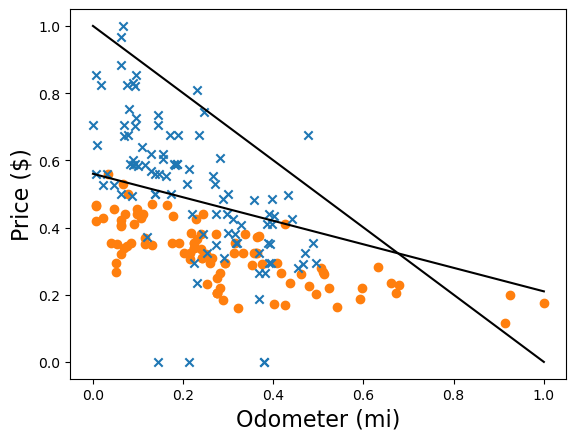

In [43]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56,)
plot_line(1,1,1)

In [44]:
logistic_cost(0.35,1,0.56)

130.9249074870046

In [45]:
logistic_cost(1,1,1)

135.56446830870462

## 15.4.4 Exercises

**Exercise:** Implement the function `plot_line(a,b,c)` referenced in the chapter that plots the line $ax + by = c$ where $0 \leq x \leq 1$ and $0 \leq y \leq 1$.

**Solution:** (see implementation above)

**Mini-project:** What does the graph of $k(x,y) = \sigma(x^2 + y^2 - 1)$ look like? What does the decision boundary look like, meaning the set of points where $k(x,y) = 0.5$?

In [46]:
def k(x,y):
    return sigmoid(x**2 + y**2 - 1)
plot_scalar_field(k,-3,3,-3,3)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

**Mini-project:** Two equations $2x + y = 1$ and $4x + 2y = 2$ define the same line, and therefore the same decision boundary.  Are the logistic functions $\sigma(2x + y - 1)$ and $\sigma(4x + 2y - 2)$ the same?

In [47]:
plot_scalar_field(lambda x,y:sigmoid(2*x+y-1),-3,3,-3,3)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

In [48]:
plot_scalar_field(lambda x,y:sigmoid(4*x+2*y-2),-3,3,-3,3)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

# 15.5 Finding the best logistic function

## 15.5.1 Gradient descent in three dimensions

In [49]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [50]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)

In [51]:
def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

In [52]:
def gradient_descent3(f,xstart,ystart,zstart,
                      tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    return x,y,z

## 15.5.2 Using gradient descent to find the best fit

In [53]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.21114493446923963, 5.045439729273302, 2.126012256718192)

In [54]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

(0.88457152767462, 6.657543188484262, 2.9550572860646596)

To make a cool graph of the decision boundary moving as gradient descent runs:

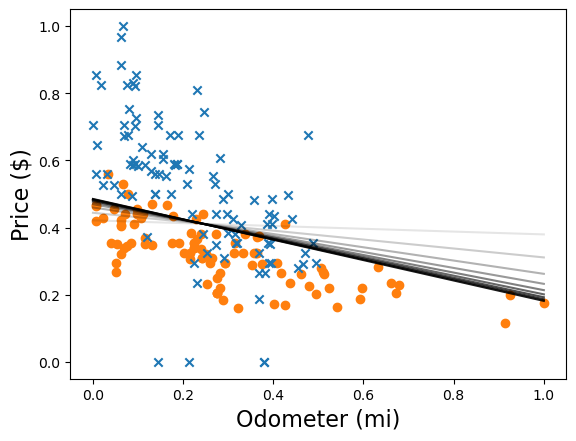

In [55]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')

In [56]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.7167004210157097, 11.422062608857626, 5.596878473958384)

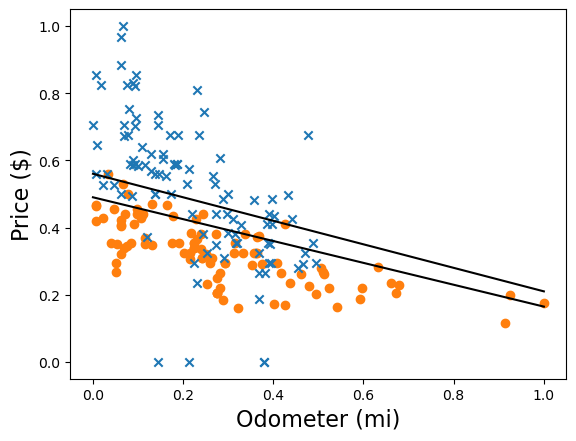

In [57]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919)

## 15.5.3 Testing an understanding the best logistic classifier

In [58]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [59]:
test_classifier(best_logistic_classifier,scaled_car_data)

0.8

In [60]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 700x700 with 0 Axes>

In [ ]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

## 15.5.5 Exercises

**Exercise:** Modify the `gradient_descent3` function to print out the total number of steps taken before it returns its result.  How many steps does the gradient descent take to converge for `logistic_cost`?

In [ ]:
def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print(steps)
    return x,y,z

In [ ]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

**Mini project:** Write an `approx_gradient` function that can calculate the gradient of a function in any number of dimensions.  Then write a `gradient_descent` function that works in any number of dimensions.  To test your `gradient_descent` on an $n$-dimensional function, you can try a function like $f(x_1,x_2, \ldots ,x_n) = (x_1 - 1)^2 + (x_2 - 1)^ + \ldots + (x_n - 1)^2$ where $x_1, x_2, \ldots , x_n$ are the $n$ input variables to the function $f$.  The minimum of this function should be $(1,1, \ldots , 1)$, an $n$-dimensional vector with 1 in every entry.

In [61]:
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg = [(vj if j != i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section, v[i], **kwargs)

In [62]:
def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

In [63]:
def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,v)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,v)
        steps += 1
    return v

In [64]:
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])

In [65]:
v = [2,2,2,2,2]
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]